# Ornstein-Uhlenbeck Process

In [4]:
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt

def generate_process(dt = 0.1,theta = 1.2, mu=0.8, sigma = 0.5, n = 10000):
    #x(t=0) = 0 and initialize x(t) with zeros
    x = np.zeros(n)
    
    for t in range(1,n):
        x[t] = x[t-1] + theta*(mu - x[t-1])*dt + sigma*normal(0,np.sqrt(dt))
    
    return x


def plot_process(x):
    plt.plot(x)
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.title('Ornstein-Uhlenbeck Process')
    plt.show()
        
        
    

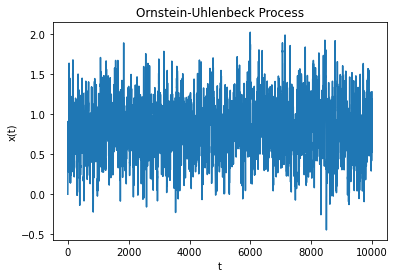

In [5]:
if __name__ == '__main__':
    data = generate_process()
    plot_process(data)
    

# Vasicek Model ( Using O-U process for mean reversion)

In [6]:
def vasicek_model(r0, kappa, theta, sigma, T=1, N = 1000):  #kappa is speed of mean reversion of interest rate
    dt = T/float(N)                                         #theta is the mean interest rate to which the model converges
    t = np.linspace(0,T,N+1)                                #sigma shows the volatility of the interest rate values
    rates = [r0]
    
    for _ in range(N):
        dr = kappa*(theta-rates[-1])*dt + sigma*normal()*np.sqrt(dt)
        rates.append(rates[-1]+dr)
        
    return t,rates


def plot_models(t,r):
    plt.plot(t,r)
    plt.xlabel('t')
    plt.ylabel('Interest Rate r(t)')
    plt.title('Vasicek Model')
    plt.show()

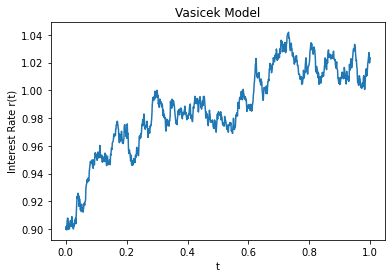

In [7]:
if __name__=='__main__':
    t,r = vasicek_model(0.9,6,1,0.09)
    plot_models(t,r)

# Bond Pricing with Vasicek Model-2

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#we will simulate 1000's of r(t) interest rate processes
NUM_OF_SIMULATIONS = 1000

#these are the number of points in a single r(t) process

NUM_OF_POINTS = 200


def monte_carlo_simulation(x,r0, kappa, theta, sigma, T=1.): #T is time to maturity
    
    dt = T/float(NUM_OF_POINTS)
    result = []
    
    for _ in  range(NUM_OF_SIMULATIONS):
        rates = [r0]
        for _ in range(NUM_OF_POINTS):
            dr = kappa*(theta-rates[-1])*dt + sigma*normal()*np.sqrt(dt)
            rates.append(rates[-1]+dr)
        
        result.append(rates)
    
    simulation_dataframe = pd.DataFrame(result)
    simulation_dataframe = simulation_dataframe.T
    
    integral_sum = simulation_dataframe.sum()*dt
    #present value of future cash flow
    present_integral_sum = np.exp(-integral_sum)
    
    #mean because the integral is the average
    bond_price = x*np.mean(present_integral_sum)
    
    
    print('Bond Price based on monte carlo simulation is $%.2f' %bond_price)
    
    
    #plt.plot(simulation_dataframe.T)
    #plt.show()
                
            
        

Bond Price based on monte carlo simulation is $586.35


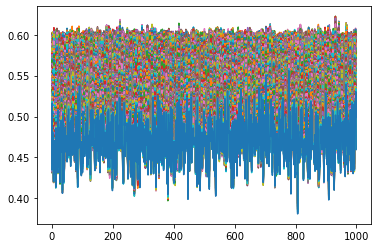

In [18]:
if __name__ == '__main__':
    monte_carlo_simulation(1000,0.6,0.3,0.1,0.03)
    